In [19]:
#load csv  dataset
import pandas as pd
df = pd.read_csv(r'C:\Users\lenovo\Desktop\students_academic_project\data\merged_dataset.csv')
print(df.head())

   StudyHours  Attendance  Resources  Extracurricular  Motivation  Internet  \
0          19          64          1                0           0         1   
1          19          64          1                0           0         1   
2          19          64          1                0           0         1   
3          19          64          1                1           0         1   
4          19          64          1                1           0         1   

   Gender  Age  LearningStyle  OnlineCourses  Discussions  \
0       0   19              2              8            1   
1       0   23              3             16            0   
2       0   28              1             19            0   
3       0   19              2              8            1   
4       0   23              3             16            0   

   AssignmentCompletion  ExamScore  EduTech  StressLevel  FinalGrade  
0                    59         40        0            1           3  
1               

In [2]:

#check for missing values
print(df.isnull().sum())

StudyHours              0
Attendance              0
Resources               0
Extracurricular         0
Motivation              0
Internet                0
Gender                  0
Age                     0
LearningStyle           0
OnlineCourses           0
Discussions             0
AssignmentCompletion    0
ExamScore               0
EduTech                 0
StressLevel             0
FinalGrade              0
dtype: int64


In [3]:
# know the data types of each column
print(df.dtypes)

StudyHours              int64
Attendance              int64
Resources               int64
Extracurricular         int64
Motivation              int64
Internet                int64
Gender                  int64
Age                     int64
LearningStyle           int64
OnlineCourses           int64
Discussions             int64
AssignmentCompletion    int64
ExamScore               int64
EduTech                 int64
StressLevel             int64
FinalGrade              int64
dtype: object


In [4]:
# check for duplicate rows
print(f'duplicate values: {df.duplicated().sum()}')


duplicate values: 1534


In [5]:
# remove duplicate rows if any
df = df.drop_duplicates()

# check if duplicates are removed
print(f'duplicate values after removal: {df.duplicated().sum()}')


duplicate values after removal: 0


In [6]:
# understand the distribution of data
print(df.describe())

         StudyHours    Attendance     Resources  Extracurricular  \
count  12469.000000  12469.000000  12469.000000     12469.000000   
mean      20.034405     80.239233      1.101371         0.583126   
std        6.049485     11.469028      0.711171         0.493061   
min        5.000000     60.000000      0.000000         0.000000   
25%       16.000000     70.000000      1.000000         0.000000   
50%       20.000000     80.000000      1.000000         1.000000   
75%       24.000000     90.000000      2.000000         1.000000   
max       44.000000    100.000000      2.000000         1.000000   

         Motivation      Internet        Gender           Age  LearningStyle  \
count  12469.000000  12469.000000  12469.000000  12469.000000   12469.000000   
mean       0.907370      0.917074      0.538616     23.529152       1.515358   
std        0.709599      0.275781      0.498527      3.510956       1.116071   
min        0.000000      0.000000      0.000000     18.000000      

Key Takeaways of data :

StudyHours:

The average study time is about 20 hours per week, with a range from 5 to 44 hours.

This suggests some students are more consistent, while others might be less engaged.

Attendance:

The average attendance is around 80%, with a minimum of 60% and a maximum of 100%.

This indicates a generally good level of attendance.

Motivation & Internet Access:

Motivation is generally high, with an average close to 1 (on a scale of 0 to 2).

Internet access is also quite high, which is great for online learning.

Age & Learning Style:

The average age is about 23.5 years, which is typical for college students.

The learning style is varied, indicating diverse preferences among students.

ExamScore & FinalGrade:

The average exam score is around 70, and the final grades are spread across the range, with most students falling in the middle categories.

StressLevel & EduTech:

Stress levels are moderate, and most students have access to educational technology.

In [7]:
# install required libraries if not already installed
!pip install matplotlib seaborn




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


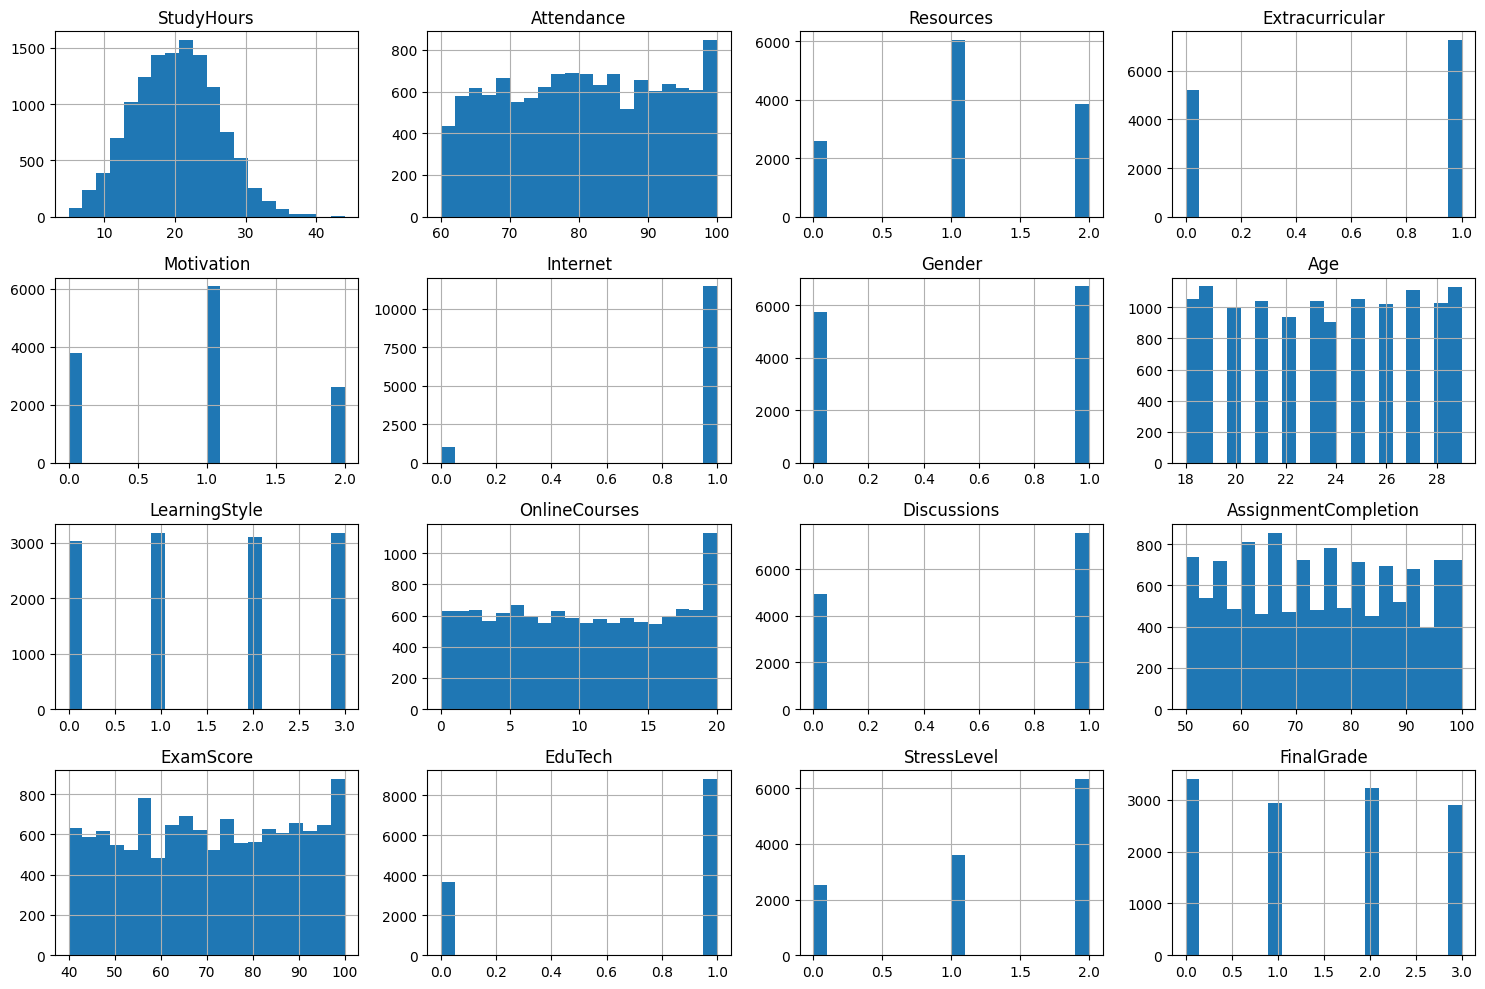

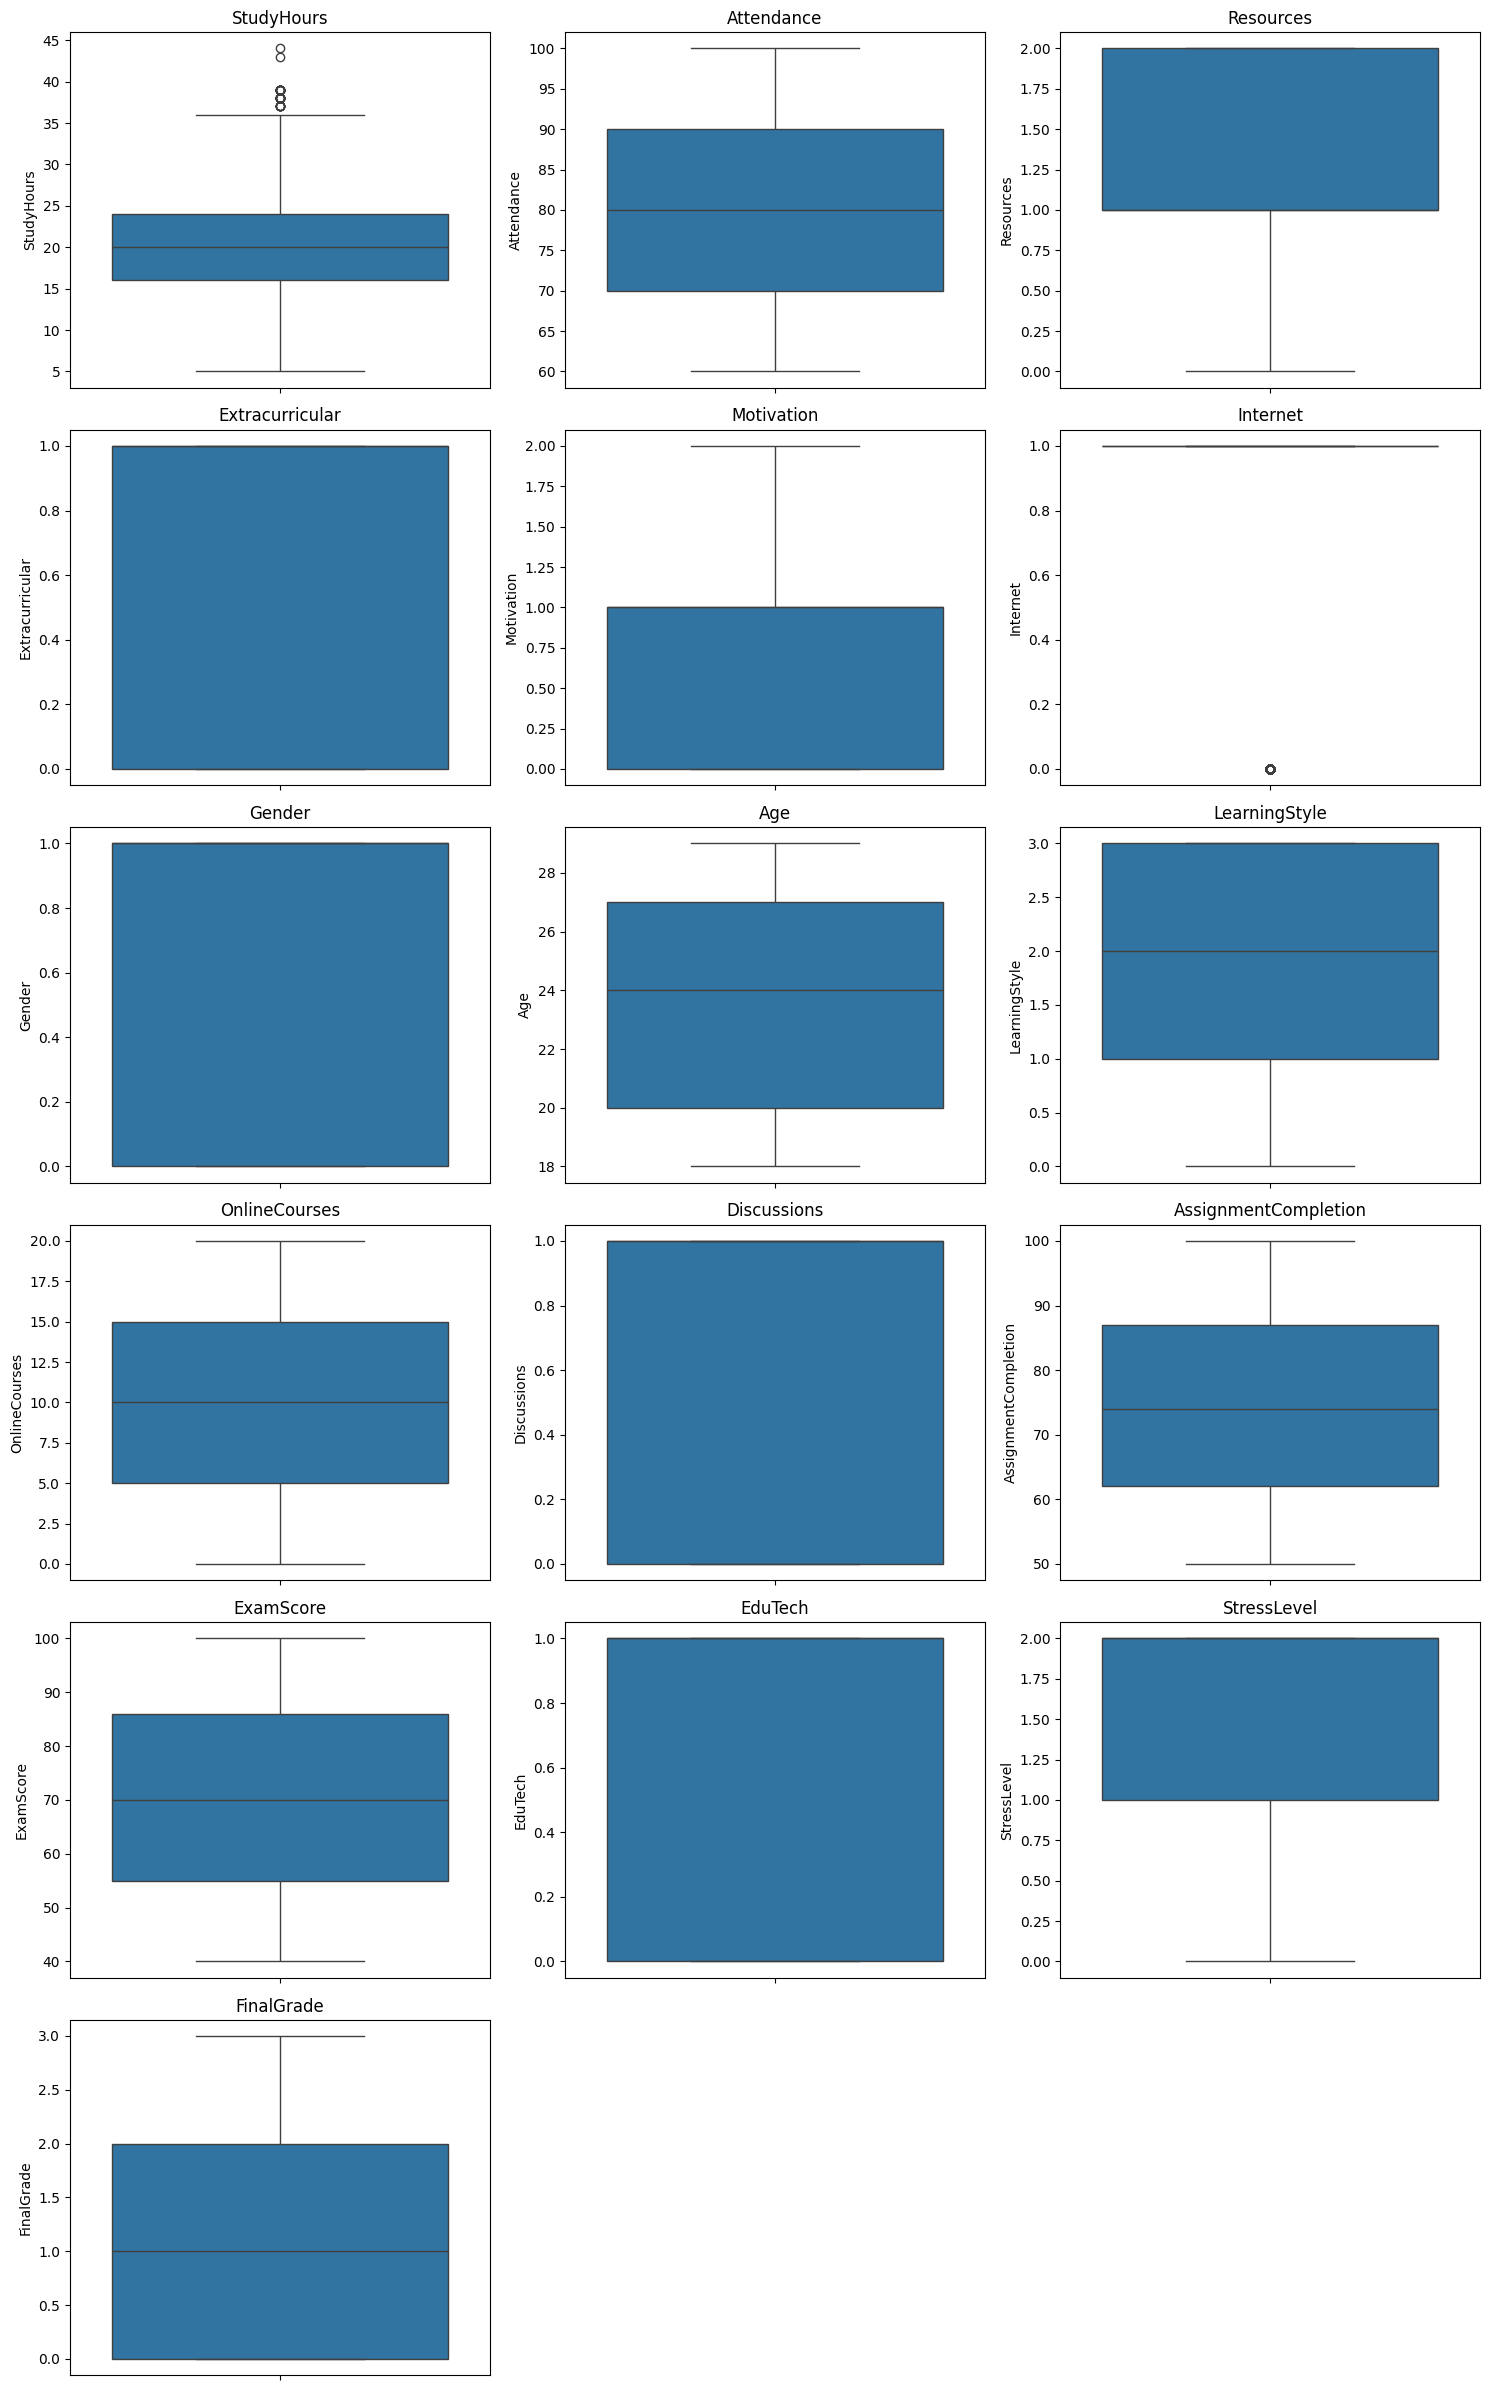

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame called df

# Get the numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Histograms -- to understand distribution
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box plots -- to identify outliers
num_plots = len(numerical_cols)
n_cols = 3
n_rows = (num_plots + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


# Key Issues Identified in the Data by the visuals 

Skewed Distributions: Features like Motivation and Internet show uneven distributions and may need transformation.

Outliers: Notable outliers found in StudyHours, ExamScore, and StressLevel, which can impact model accuracy.

High Variability: Features like Age and LearningStyle have wide ranges, indicating diverse student backgrounds.

In [21]:
# check the data 
print(df.head())
# do the preprocessing steps as needed
# For example, handling missing values, encoding categorical variables, scaling, etc.
# After preprocessing, check the data again
print(df.info())

   StudyHours  Attendance  Resources  Extracurricular  Motivation  Internet  \
0          19          64          1                0           0         1   
1          19          64          1                0           0         1   
2          19          64          1                0           0         1   
3          19          64          1                1           0         1   
4          19          64          1                1           0         1   

   Gender  Age  LearningStyle  OnlineCourses  Discussions  \
0       0   19              2              8            1   
1       0   23              3             16            0   
2       0   28              1             19            0   
3       0   19              2              8            1   
4       0   23              3             16            0   

   AssignmentCompletion  ExamScore  EduTech  StressLevel  FinalGrade  
0                    59         40        0            1           3  
1               

In [23]:
# save the cleaned data
df.to_csv(r'..\data\processed_data.csv', index=False)
